Write a program using tensorflow to calculate : 
    $$y=mx+c$$

### Part 1

1. Read 2 arrays x,y containing floating point values
2. Calculate mean of x & y
3. Calculate variance for x
    $$variance(x)=sum((x-mean(x))^2)$$
4. Calculate covariance of x & y
    $$covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))$$
5. Calculate value of m
    $$m = covariance(x,y)/variance(x)$$
6. Calculate value of c
    $$c = mean(y) -m* mean(x)$$
    

### Part 2

1. Plot graph for actual values against predicted value
2. Calculate root mean square error.

In [5]:
import tensorflow as tf

with tf.name_scope("var"):
    with tf.name_scope("mean_x"):
        a1=tf.constant([34.0, 36.0, 38.0,40.0,42.0],shape=[1,5],name='a1')
        b1=tf.constant([52.0, 54.0, 56.0,12.0,60.0],shape=[1,5],name='b1')
        x=tf.reduce_mean(a1)
        sess=tf.Session()
    print(sess.run(x))
    with tf.name_scope("mean_y"):
        y=tf.reduce_mean(b1)
        sess=tf.Session()
        print(sess.run(y))
d=tf.subtract(a1,x)
sess=tf.Session()
print(sess.run(d))
       
e=tf.square(d)
var=tf.reduce_sum(e)
sess=tf.Session()
print(sess.run(var))    
    
with tf.name_scope("covariance"):
    g=tf.subtract(b1,y)
    sess=tf.Session()
    g=tf.multiply(d,g)
    h=tf.reduce_sum(g)
    print(sess.run(h))    

with tf.name_scope("value_of_m"):
    j=tf.divide(h,var)
    print(sess.run(j))

with tf.name_scope("value_c"):
    i=tf.multiply(j,x)
    k=tf.subtract(y,i)
    print(sess.run(k))  
    
    
#calculating root mean square error
with tf.name_scope("root_mean_square_error"):
    l=tf.subtract(b1,y)
    m=tf.multiply(l, l)
    n=tf.reduce_sum(m)
    o=tf.divide(n, 5,)
    p=tf.sqrt(o)
    print (sess.run(p))
    

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp/tboard/output3", sess.graph)
    print(sess.run(k))
    writer.close()



38.0
46.8
[[-4. -2.  0.  2.  4.]]
40.0
-52.0
-1.3
96.2
17.6
96.2


In [6]:
#estimating y values from x values
import numpy 

with tf.Session() as sess:
    x1=sess.run(a1)
    y1=sess.run(b1)
graph_X = numpy.asarray(x1)
graph_Y = numpy.asarray(y1)


x2=tf.constant([31.0,48.0, 51.0, 53.0, 62.0])
with tf.Session() as sess:
    x3=sess.run(x2)
x4=numpy.asarray(x3)

y2=[0]*5
    
with tf.Session() as sess:
        for i in range(len(sess.run(x2))):
            xx = sess.run(x2[i])
            a=tf.multiply(xx,j)
            b=tf.add(a,k)
            y2[i]=sess.run(b)
print(y2)

[55.899998, 33.799999, 29.900002, 27.300003, 15.599998]


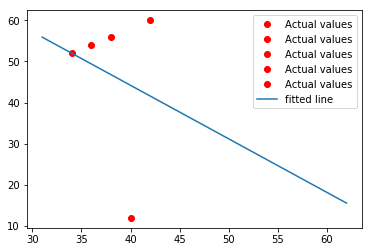

In [7]:
#graphs
import matplotlib.pyplot as plt
plt.plot(graph_X,graph_Y, 'ro', label='Actual values')
plt.plot(x4, y2, label='fitted line')
plt.legend()
plt.show()